# Introduction

QA plots for the calorimeter response to single particle inputs

In [1]:
# imports to write dynamic markdown contents
import os
from IPython.display import display, Markdown, Latex
from IPython.display import HTML

In [2]:
# turn off/on code for the result HTML page

display(Markdown('*For the result HTML page:* '))
    
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.jp-CodeMirrorEditor').hide(); // for newer versions of nbviewer.org
 } else {
 $('div.input').show();
 $('div.jp-CodeMirrorEditor').show(); // for newer versions of nbviewer.org
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

*For the result HTML page:* 

In [3]:
# initialization

display(Markdown('pyROOT env check:'))

import ROOT

OFFLINE_MAIN = os.getenv("OFFLINE_MAIN")
if OFFLINE_MAIN is not None:
    display(Markdown(f"via sPHENIX software distribution at `{OFFLINE_MAIN}`"))

pyROOT env check:

Welcome to JupyROOT 6.26/06


via sPHENIX software distribution at `/var/lib/jenkins/workspace/sPHENIX/Build-Master-gcc12/build/new/install.1`

In [4]:
import subprocess

try:
    git_url = \
        subprocess.run(['git','remote','get-url','origin'], stdout=subprocess.PIPE)\
        .stdout.decode('utf-8').strip()\
        .replace('git@github.com:','https://github.com/')

    display(Markdown(f"View the source code repository at {git_url}"))
except: # catch *all* exceptions
    #     well do nothing
    pass


View the source code repository at https://github.com/sPHENIX-Collaboration/QA-gallery.git

In [5]:
display(Markdown('Some further details about the QA run, if executed under the Jenkins CI:'))

checkrun_repo_commit = os.getenv("checkrun_repo_commit")
if checkrun_repo_commit is not None:
    display(Markdown(f"* The commit being checked is {checkrun_repo_commit}"))
        
ghprbPullLink = os.getenv("ghprbPullLink")
if ghprbPullLink is not None:
    display(Markdown(f"* Link to the pull request: {ghprbPullLink}"))

BUILD_URL =  os.getenv("BUILD_URL")
if BUILD_URL is not None:
    display(Markdown(f"* Link to the build: {BUILD_URL}"))

RUN_ARTIFACTS_DISPLAY_URL = os.getenv("RUN_ARTIFACTS_DISPLAY_URL")
if RUN_ARTIFACTS_DISPLAY_URL is not None:
    display(Markdown(f"* Download the QA ROOT files: {RUN_ARTIFACTS_DISPLAY_URL}"))

JENKINS_URL  = os.getenv("JENKINS_URL")
if JENKINS_URL is not None:
    display(Markdown(f"Automatically generated by [sPHENIX Jenkins continuous integration]({JENKINS_URL}) [![sPHENIX](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/sphenix-logo-white-bg-72p.png)](https://www.sphenix.bnl.gov/web/) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [![jenkins.io](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/jenkins_logo_title-72p.png)](https://jenkins.io/)"))

Some further details about the QA run, if executed under the Jenkins CI:

* The commit being checked is sPHENIX-Collaboration/coresoftware/042c3db62b701a6f16f044b5b685416172840965

* Link to the pull request: https://github.com/sPHENIX-Collaboration/coresoftware/pull/3044

* Link to the build: https://web.sdcc.bnl.gov/jenkins-sphenix/job/sPHENIX/job/test-calo-single-qa/6963/

* Download the QA ROOT files: https://web.sdcc.bnl.gov/jenkins-sphenix/job/sPHENIX/job/test-calo-single-qa/6963/display/redirect?page=artifacts

Automatically generated by [sPHENIX Jenkins continuous integration](https://web.sdcc.bnl.gov/jenkins-sphenix/) [![sPHENIX](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/sphenix-logo-white-bg-72p.png)](https://www.sphenix.bnl.gov/web/) &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; [![jenkins.io](https://raw.githubusercontent.com/sPHENIX-Collaboration/utilities/master/jenkins/material/jenkins_logo_title-72p.png)](https://jenkins.io/)


# Initialization

In [6]:
%%cpp -d

#include "QA_Draw_Utility.C"

#include <sPhenixStyle.C>

#include <TFile.h>
#include <TLine.h>
#include <TString.h>
#include <TTree.h>
#include <cassert>
#include <cmath>

In [7]:
%%cpp

SetsPhenixStyle();
TVirtualFitter::SetDefaultFitter("Minuit2");

// test sPHENIX lib load
// gSystem->Load("libg4eval.so");

// test libs
// gSystem->ListLibraries();

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


## Inputs and file checks

In [8]:

qa_file_name_new = os.getenv("qa_file_name_new")
if qa_file_name_new is None:
    qa_file_name_new = "G4sPHENIX_pi+_pT30_Sum15_qa.root"
    display(Markdown(f"`qa_file_name_new` env not set. use the default `qa_file_name_new={qa_file_name_new}`"))

qa_file_name_ref = os.getenv("qa_file_name_ref")
if qa_file_name_ref is None:
    qa_file_name_ref = "reference/G4sPHENIX_pi+_pT30_Sum15_qa.root"
    display(Markdown(f"`qa_file_name_ref` env not set. use the default `qa_file_name_ref={qa_file_name_ref}`"))
elif qa_file_name_ref == 'None':
    qa_file_name_ref = None
    display(Markdown(f"`qa_file_name_ref` = None and we are set to not to use the reference histograms"))
    


In [9]:
# qa_file_new = ROOT.TFile.Open(qa_file_name_new);

# assert qa_file_new.IsOpen()
# qa_file_new.ls()
display(Markdown(f"Openning QA file at `{qa_file_name_new}`"))
ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_new = new TFile(\"{qa_file_name_new}\");")

if qa_file_name_ref is not None:
#     qa_file_ref = ROOT.TFile.Open(qa_file_name_ref);

#     assert qa_file_ref.IsOpen()
    display(Markdown(f"Openning QA reference file at `{qa_file_name_ref}`"))
    ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_ref = new TFile(\"{qa_file_name_ref}\");")
else:
    ROOT.gInterpreter.ProcessLine(f"TFile *qa_file_ref = nullptr;")


Openning QA file at `G4sPHENIX_pi+_pT30_Sum10_qa.root`

Openning QA reference file at `reference/G4sPHENIX_pi+_pT30_Sum10_qa.root`

In [10]:
%%cpp

if (qa_file_new == nullptr) 
{
    cout <<"Error, can not open QA root file"<<qa_file_name_new<<endl;
    exit(1);
}

// list inputs histograms if needed
// qa_file_new ->ls();

//TFile *qa_file_ref = NULL;
//if (qa_file_name_ref)
//{
//    qa_file_ref = new TFile(qa_file_name_ref);
//  
//    if (qa_file_ref == nullptr) 
//    {
//        cout <<"Error, can not open QA root file"<<qa_file_name_ref<<endl;
//        exit(1);
//    }
//}

# CEMC

Central EMCal checks

## CEMC G4 hits

Low level Geant4 simulation check for the CEMC

In [11]:
%jsroot off

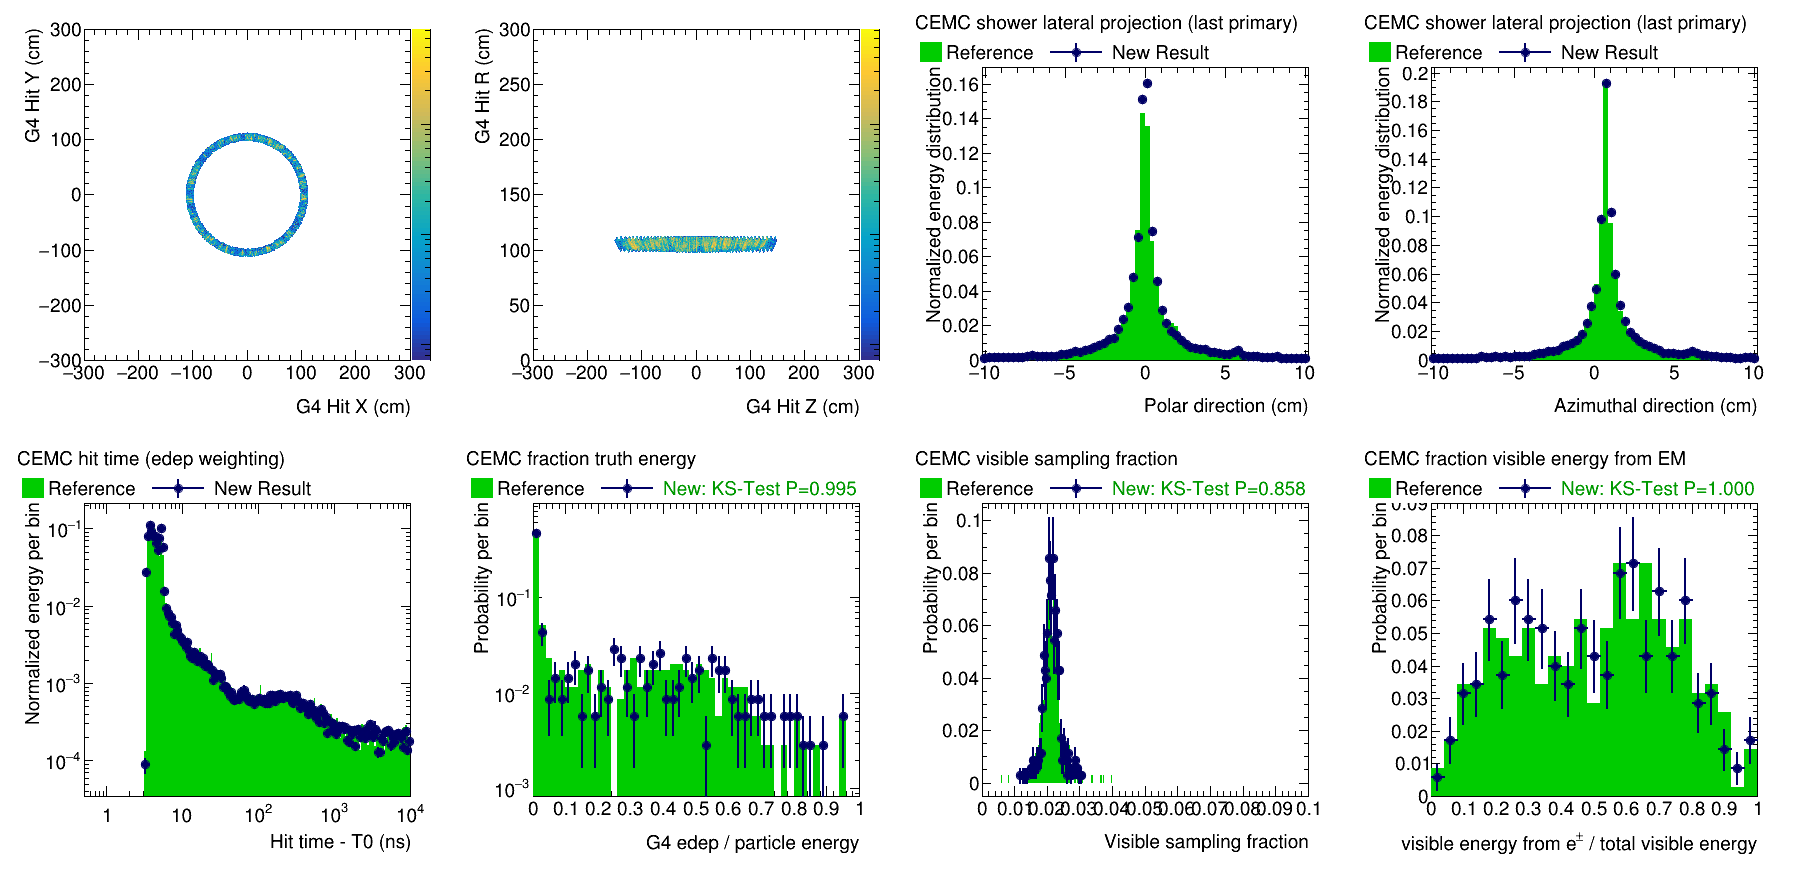

In [12]:
%%cpp

{
    TCanvas *c1 = new TCanvas("QA_Draw_CEMC_G4Hit", "QA_Draw_CEMC_G4Hit", 1800, 900);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_CEMC_G4Hit_XY = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_CEMC_G4Hit_XY", "TH2F");
  assert(h_QAG4Sim_CEMC_G4Hit_XY);
  h_QAG4Sim_CEMC_G4Hit_XY->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_CEMC_G4Hit_XY->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_CEMC_G4Hit_RZ = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_CEMC_G4Hit_RZ", "TH2F");
  assert(h_QAG4Sim_CEMC_G4Hit_RZ);
  h_QAG4Sim_CEMC_G4Hit_RZ->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_CEMC_G4Hit_RZ->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_px");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

      proj_ref = h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionX(
          "qa_file_ref_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_px");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_py");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection);

      proj_ref = h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection->ProjectionY(
          "qa_file_ref_h_QAG4Sim_CEMC_G4Hit_LateralTruthProjection_py");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_HitTime", "TH1F");
    assert(h_new);

    h_new->Rebin(5);
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_HitTime", "TH1F");
      assert(h_ref);

      h_ref->Rebin(5);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized energy per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_FractionTruthEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(20);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_FractionTruthEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(20);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_VSF", "TH1F");
    assert(h_new);

    h_new->Rebin(2);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_VSF", "TH1F");
      assert(h_ref);

      h_ref->Rebin(2);
      //h_ref->Sumw2();
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_G4Hit_FractionEMVisibleEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(4);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_G4Hit_FractionEMVisibleEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(4);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  c1->Draw();
//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
  // SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    
}

## CEMC tower and clusters

Check on towers and clusters

In [13]:
%jsroot on

In [14]:
%%cpp


{
    
  TCanvas *c1 = new TCanvas("QA_Draw_CEMC_TowerCluster", "QA_Draw_CEMC_TowerCluster", 950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_Tower_1x1", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_Tower_1x1", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized tower count per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_Tower_3x3", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_Tower_3x3", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized tower count per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_Tower_1x1_max", "TH1F");
    assert(h_new);

    h_new->Rebin(40);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_Tower_1x1_max", "TH1F");
      assert(h_ref);

      h_ref->Rebin(40);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_Tower_4x4_max", "TH1F");
    assert(h_new);

    h_new->Rebin(40);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_Tower_4x4_max", "TH1F");
      assert(h_ref);

      h_ref->Rebin(40);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_CEMC_Cluster_LateralTruthProjection =
      (TH2F *) qa_file_new->GetObjectChecked(
          "h_QAG4Sim_CEMC_Cluster_LateralTruthProjection", "TH2F");
  assert(h_QAG4Sim_CEMC_Cluster_LateralTruthProjection);
  h_QAG4Sim_CEMC_Cluster_LateralTruthProjection  -> SetDirectory(nullptr);
    
  h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->GetYaxis()->SetTitleOffset(
      1.5);
  h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->GetXaxis()->SetRangeUser(-8,
                                                                          8);
  h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->GetYaxis()->SetRangeUser(-8,
                                                                          8);
  h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CEMC_Cluster_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CEMC_Cluster_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_CEMC_Cluster_LateralTruthProjection);
    h_QAG4Sim_CEMC_Cluster_LateralTruthProjection  -> SetDirectory(nullptr);

    TH1D *proj_new =
        h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_CEMC_Cluster_LateralTruthProjection_px");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_CEMC_Cluster_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CEMC_Cluster_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_CEMC_Cluster_LateralTruthProjection);
     h_QAG4Sim_CEMC_Cluster_LateralTruthProjection  -> SetDirectory(nullptr);

      proj_ref = h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->ProjectionX(
          "qa_file_ref_h_QAG4Sim_CEMC_Cluster_LateralTruthProjection_px");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitleOffset(1.);
    proj_new->GetXaxis()->SetTitleOffset(1.);
    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CEMC_Cluster_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CEMC_Cluster_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_CEMC_Cluster_LateralTruthProjection);
    h_QAG4Sim_CEMC_Cluster_LateralTruthProjection  -> SetDirectory(nullptr);

    TH1D *proj_new =
        h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_CEMC_Cluster_LateralTruthProjection_py");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_CEMC_Cluster_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CEMC_Cluster_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_CEMC_Cluster_LateralTruthProjection);
     h_QAG4Sim_CEMC_Cluster_LateralTruthProjection  -> SetDirectory(nullptr);

      proj_ref = h_QAG4Sim_CEMC_Cluster_LateralTruthProjection->ProjectionY(
          "qa_file_ref_h_QAG4Sim_CEMC_Cluster_LateralTruthProjection_py");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitleOffset(1.);
    proj_new->GetXaxis()->SetTitleOffset(1.);
    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CEMC_Cluster_BestMatchERatio", "TH1F");
    assert(h_new);

    h_new->Rebin(2);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CEMC_Cluster_BestMatchERatio", "TH1F");
      assert(h_ref);

      h_ref->Rebin(2);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

    c1->Draw();
//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
  // SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
}

# Inner HCal

Inner HCal checks

## HCalIn G4 hits

Low level Geant4 simulation check for the Inner HCal

In [15]:
%jsroot off

Warning in <TH1F::Rebin>: ngroup=6 is not an exact divider of nbins=1000.
Warning in <TH1F::Rebin>: ngroup=6 is not an exact divider of nbins=1000.


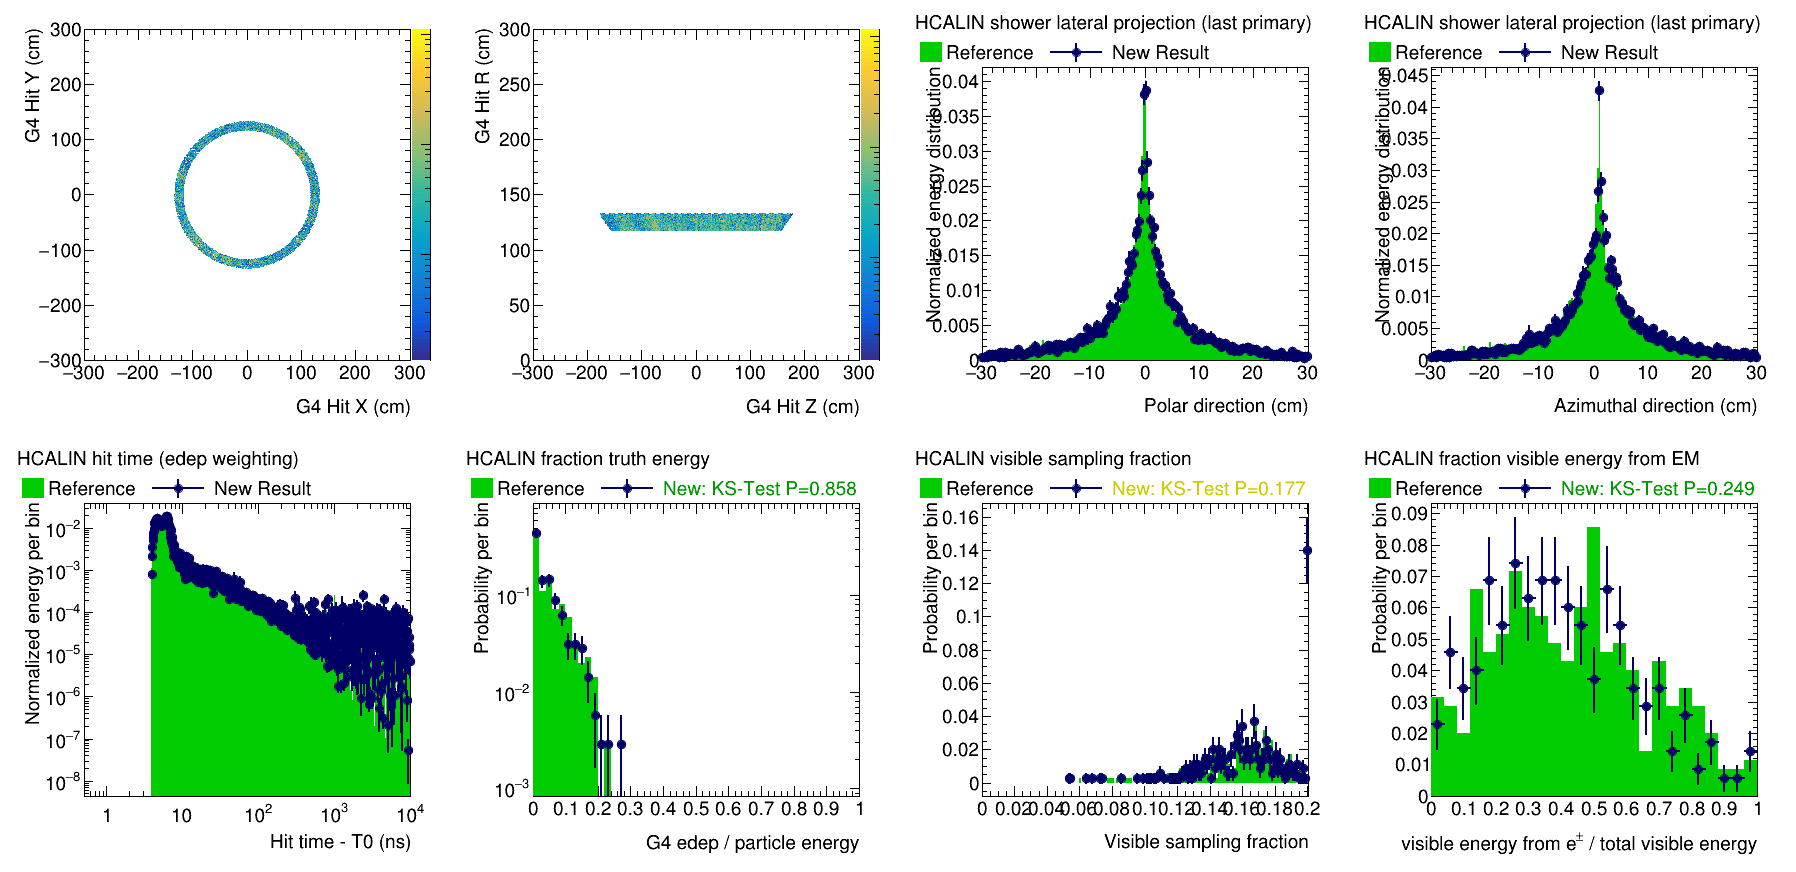

In [16]:
%%cpp

{
    
  TCanvas *c1 = new TCanvas("QA_Draw_HCALIN_G4Hit", "QA_Draw_HCALIN_G4Hit",
                            1800, 900);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_HCALIN_G4Hit_XY = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_HCALIN_G4Hit_XY", "TH2F");
  assert(h_QAG4Sim_HCALIN_G4Hit_XY);
  h_QAG4Sim_HCALIN_G4Hit_XY->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_HCALIN_G4Hit_XY->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_HCALIN_G4Hit_RZ = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_HCALIN_G4Hit_RZ", "TH2F");
  assert(h_QAG4Sim_HCALIN_G4Hit_RZ);
  h_QAG4Sim_HCALIN_G4Hit_RZ->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_HCALIN_G4Hit_RZ->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection_px");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection);

      proj_ref = h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection->ProjectionX(
          "qa_file_ref_h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection_px");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection_py");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection);

      proj_ref = h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection->ProjectionY(
          "qa_file_ref_h_QAG4Sim_HCALIN_G4Hit_LateralTruthProjection_py");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_G4Hit_HitTime", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_G4Hit_HitTime", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized energy per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_G4Hit_FractionTruthEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(20);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_G4Hit_FractionTruthEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(20);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_G4Hit_VSF", "TH1F");
    assert(h_new);

    h_new->Rebin(6);
    //        h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_G4Hit_VSF", "TH1F");
      assert(h_ref);

      h_ref->Rebin(6);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    h_new->GetXaxis()->SetRangeUser(-0, .2);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_G4Hit_FractionEMVisibleEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(4);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_G4Hit_FractionEMVisibleEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(4);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    
    c1->Draw();
}

## HCal In tower and clusters

Check on towers and clusters

In [17]:
%jsroot on

In [18]:
%%cpp
{
    
    
  TCanvas *c1 = new TCanvas("QA_Draw_HCALIN_TowerCluster",
                            "QA_Draw_HCALIN_TowerCluster", 950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_Tower_1x1", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_Tower_1x1", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized tower count per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_Tower_3x3", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_Tower_3x3", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }
          h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized tower count per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_Tower_1x1_max", "TH1F");
    assert(h_new);

    h_new->Rebin(40);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_Tower_1x1_max", "TH1F");
      assert(h_ref);

      h_ref->Rebin(40);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_Tower_4x4_max", "TH1F");
    assert(h_new);

    h_new->Rebin(40);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_Tower_4x4_max", "TH1F");
      assert(h_ref);

      h_ref->Rebin(40);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection =
      (TH2F *) qa_file_new->GetObjectChecked(
          "h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection", "TH2F");
  assert(h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection);
  h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->GetYaxis()->SetTitleOffset(
      1.5);
  //  h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->GetXaxis()->SetRangeUser(-5,
  //      5);
  //  h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->GetYaxis()->SetRangeUser(-5,
  //      5);
  h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection_px");
    proj_new->Rebin(4);

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection);

      proj_ref =
          h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->ProjectionX(
              "qa_file_ref_h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection_px");
      proj_ref->Rebin(4);
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitleOffset(1.);
    proj_new->GetXaxis()->SetTitleOffset(1.);
    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection_py");

    proj_new->Rebin(4);
    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection);

      proj_ref =
          h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection->ProjectionY(
              "qa_file_ref_h_QAG4Sim_HCALIN_Cluster_LateralTruthProjection_py");
      proj_ref->Rebin(4);
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitleOffset(1.);
    proj_new->GetXaxis()->SetTitleOffset(1.);
    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALIN_Cluster_BestMatchERatio", "TH1F");
    assert(h_new);

    h_new->Rebin(2);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALIN_Cluster_BestMatchERatio", "TH1F");
      assert(h_ref);

      h_ref->Rebin(2);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    
    c1->Draw();
    
}

# Outer HCal

Outer HCal checks

## HCalOut G4 hits

Low level Geant4 simulation check for the Outer HCal

In [19]:
%jsroot off

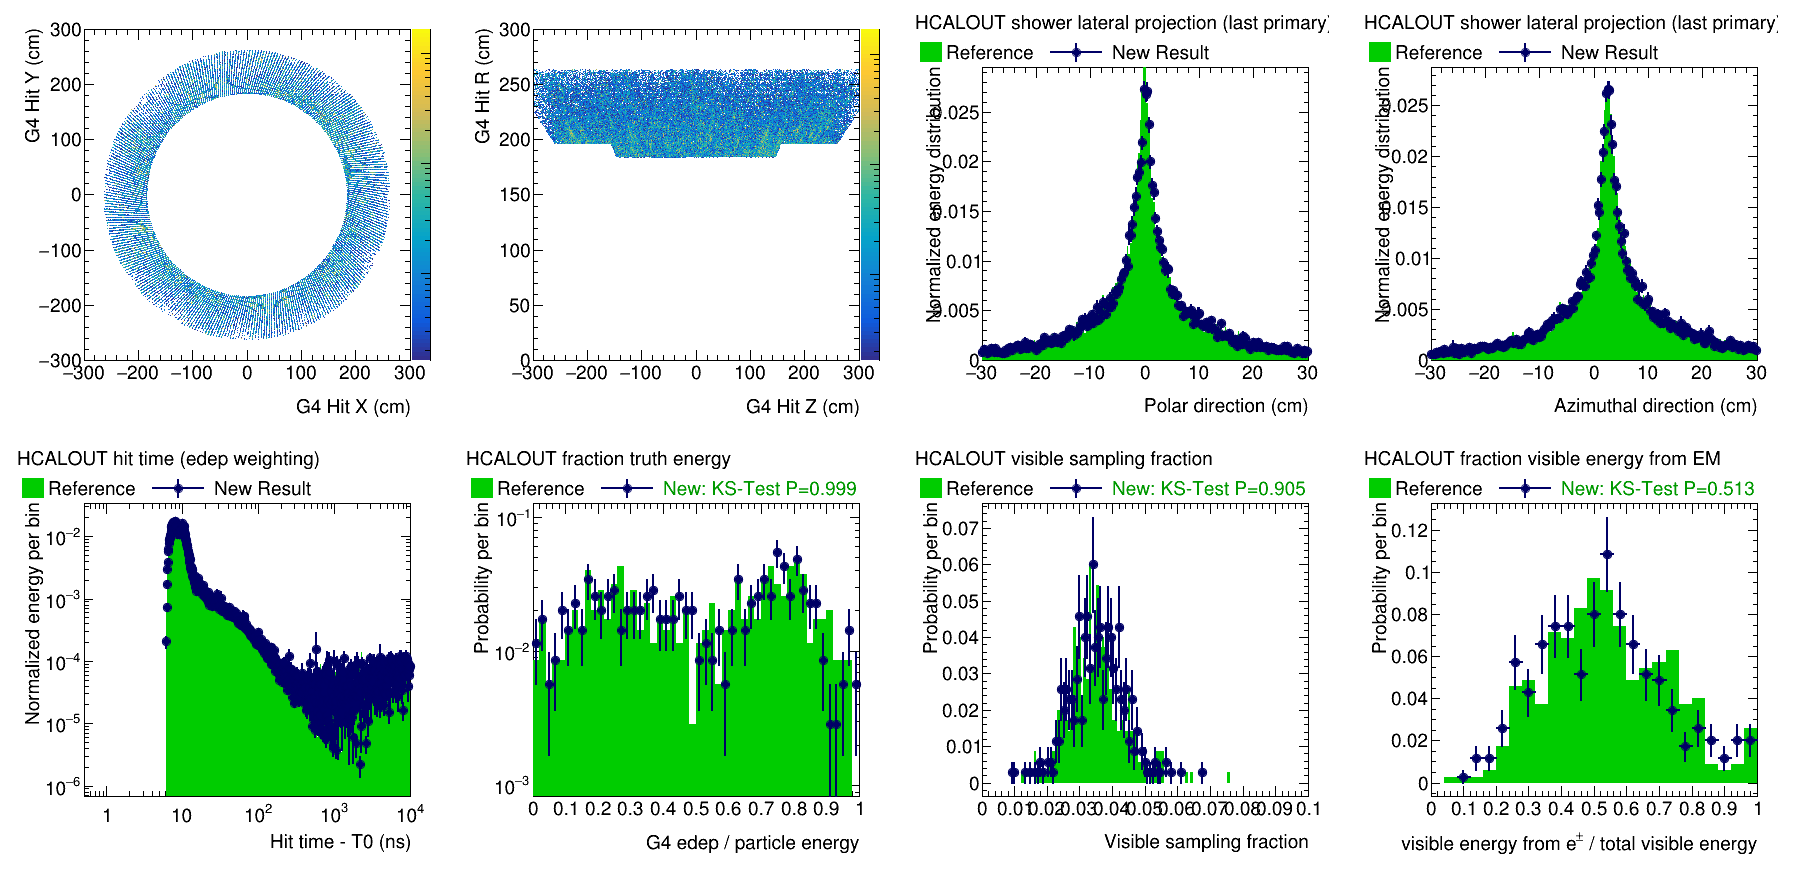

In [20]:
%%cpp
{
    
  TCanvas *c1 = new TCanvas("QA_Draw_HCALOUT_G4Hit", "QA_Draw_HCALOUT_G4Hit",
                            1800, 900);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_HCALOUT_G4Hit_XY = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_HCALOUT_G4Hit_XY", "TH2F");
  assert(h_QAG4Sim_HCALOUT_G4Hit_XY);
  h_QAG4Sim_HCALOUT_G4Hit_XY->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_HCALOUT_G4Hit_XY->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_HCALOUT_G4Hit_RZ = (TH2F *) qa_file_new->GetObjectChecked(
      "h_QAG4Sim_HCALOUT_G4Hit_RZ", "TH2F");
  assert(h_QAG4Sim_HCALOUT_G4Hit_RZ);
  h_QAG4Sim_HCALOUT_G4Hit_RZ->GetYaxis()->SetTitleOffset(1.5);
  h_QAG4Sim_HCALOUT_G4Hit_RZ->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection_px");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection);

      proj_ref =
          h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection->ProjectionX(
              "qa_file_ref_h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection_px");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection_py");

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection);

      proj_ref =
          h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection->ProjectionY(
              "qa_file_ref_h_QAG4Sim_HCALOUT_G4Hit_LateralTruthProjection_py");
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_G4Hit_HitTime", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_G4Hit_HitTime", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized energy per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref, false, false); // not to use this histogram in KSTests
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_G4Hit_FractionTruthEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(20);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_G4Hit_FractionTruthEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(20);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_G4Hit_VSF", "TH1F");
    assert(h_new);

    h_new->Rebin(4);
    //        h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_G4Hit_VSF", "TH1F");
      assert(h_ref);

      h_ref->Rebin(4);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_G4Hit_FractionEMVisibleEnergy", "TH1F");
    assert(h_new);

    h_new->Rebin(4);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_G4Hit_FractionEMVisibleEnergy", "TH1F");
      assert(h_ref);

      h_ref->Rebin(4);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    c1->Draw();
}

## HCal Out tower and clusters

Check on towers and clusters

In [21]:
%jsroot on

In [22]:
%%cpp
{
    

  TCanvas *c1 = new TCanvas("QA_Draw_HCALOUT_TowerCluster",
                            "QA_Draw_HCALOUT_TowerCluster", 950, 600);
  c1->Divide(4, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_Tower_1x1", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_Tower_1x1", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized tower count per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_Tower_3x3", "TH1F");
    assert(h_new);

    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_Tower_3x3", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Normalized tower count per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_Tower_1x1_max", "TH1F");
    assert(h_new);

    h_new->Rebin(40);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_Tower_1x1_max", "TH1F");
      assert(h_ref);

      h_ref->Rebin(40);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //    p->SetLogx();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_Tower_4x4_max", "TH1F");
    assert(h_new);

    h_new->Rebin(40);
//     h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_Tower_4x4_max", "TH1F");
      assert(h_ref);

      h_ref->Rebin(40);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  TH2F *h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection =
      (TH2F *) qa_file_new->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection", "TH2F");
  assert(h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection);
  h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->GetYaxis()->SetTitleOffset(
      1.5);
  //  h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->GetXaxis()->SetRangeUser(-5,
  //      5);
  //  h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->GetYaxis()->SetRangeUser(-5,
  //      5);
  h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->Draw("COLZ");

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->ProjectionX(
            "qa_file_new_h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection_px");
    proj_new->Rebin(4);

    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection);

      proj_ref =
          h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->ProjectionX(
              "qa_file_ref_h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection_px");
      proj_ref->Rebin(4);
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitleOffset(1.);
    proj_new->GetXaxis()->SetTitleOffset(1.);
    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  //  p->SetLogz();

  {
    TH2F *h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection", "TH2F");
    assert(h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection);

    TH1D *proj_new =
        h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->ProjectionY(
            "qa_file_new_h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection_py");

    proj_new->Rebin(4);
    proj_new->Scale(1. / proj_new->GetSum());

    TH1D *proj_ref = NULL;
    if (qa_file_ref)
    {
      TH2F *h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection", "TH2F");
      assert(h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection);

      proj_ref =
          h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection->ProjectionY(
              "qa_file_ref_h_QAG4Sim_HCALOUT_Cluster_LateralTruthProjection_py");
      proj_ref->Rebin(4);
      proj_ref->Scale(1. / proj_ref->GetSum());
    }

    proj_new->GetYaxis()->SetTitleOffset(1.);
    proj_new->GetXaxis()->SetTitleOffset(1.);
    proj_new->GetYaxis()->SetTitle("Normalized energy distribution");
    //      proj_new->GetXaxis()->SetRangeUser(-10, 10);

    DrawReference(proj_new, proj_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();
  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_HCALOUT_Cluster_BestMatchERatio", "TH1F");
    assert(h_new);

    h_new->Rebin(2);
    //h_new->Sumw2();
    h_new->Scale(1. / h_new->GetSum());

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_HCALOUT_Cluster_BestMatchERatio", "TH1F");
      assert(h_ref);

      h_ref->Rebin(2);
      h_ref->Scale(1. / h_ref->GetSum());
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Probability per bin");
    //          h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    c1->Draw();
    
}

# Calorimeter Stack

## Cluster checks

property for the sum of three clusters one in each layer of the calorimeter 

In [23]:
%jsroot on

In [24]:
%%cpp
{
    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  if (qa_file_new)
  {
    TH1D *h_norm = (TH1D *) qa_file_new->GetObjectChecked(
        TString("h_QAG4Sim_CalorimeterSum_Normalization"), "TH1D");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }
  if (qa_file_ref)
  {
    TH1D *h_norm = (TH1D *) qa_file_ref->GetObjectChecked(
        TString("h_QAG4Sim_CalorimeterSum_Normalization"), "TH1D");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
  }

  TCanvas *c1 = new TCanvas("QA_Draw_Calorimeter_Sum_Cluster",
                            "QA_Draw_Calorimeter_Sum_Cluster", 950, 600);
  c1->Divide(3, 2);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN", "TH2F");
    assert(h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN);
    h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN->GetYaxis()->SetTitleOffset(
        1.5);
    h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN->Draw("COLZ");
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogz();

  {
    TH2F *h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN_HCALOUT =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN_HCALOUT", "TH2F");
    assert(h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN_HCALOUT);
    h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN_HCALOUT->GetYaxis()->SetTitleOffset(
        1.5);
    h_QAG4Sim_CalorimeterSum_Cluster_CEMC_HCALIN_HCALOUT->Draw("COLZ");
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  // empty pannel

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CalorimeterSum_Cluster_Ratio_CEMC_HCALIN", "TH1F");
    assert(h_new);

//     h_new->Sumw2();
    h_new->Scale(1. / Nevent_new);

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CalorimeterSum_Cluster_Ratio_CEMC_HCALIN", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / Nevent_ref);
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Count / event / bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CalorimeterSum_Cluster_Ratio_CEMC_HCALIN_HCALOUT", "TH1F");
    assert(h_new);

//     h_new->Sumw2();
    h_new->Scale(1. / Nevent_new);

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CalorimeterSum_Cluster_Ratio_CEMC_HCALIN_HCALOUT",
          "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / Nevent_ref);
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Count / event / bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CalorimeterSum_Cluster_EP", "TH1F");
    assert(h_new);

//     h_new->Sumw2();
    h_new->Scale(1. / Nevent_new);

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CalorimeterSum_Cluster_EP", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / Nevent_ref);
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Count / event / bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

//  PutInputFileName(c1, .04, qa_file_name_new, qa_file_name_ref);
//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    c1->Draw();
}

## Track projection matching

*TODO: This QA module was broken since the change of the track projection module. Need to be Fixed*

In [25]:
%%cpp

if (false)
{
    
  // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  // obtain normalization
  double Ntrack_new = 0;
  double Ntrack_ref = 0;

  if (qa_file_new)
  {
    TH1D *h_norm = (TH1D *) qa_file_new->GetObjectChecked(
        TString("h_QAG4Sim_CalorimeterSum_Normalization"), "TH1D");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
    Ntrack_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Track"));
  }
  if (qa_file_ref)
  {
    TH1D *h_norm = (TH1D *) qa_file_ref->GetObjectChecked(
        TString("h_QAG4Sim_CalorimeterSum_Normalization"), "TH1D");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
    Ntrack_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Track"));
  }

  vector<string> subsystems;
  subsystems.push_back("CEMC");
  subsystems.push_back("HCALIN");
  subsystems.push_back("HCALOUT");

  TCanvas *c1 = new TCanvas("QA_Draw_Calorimeter_Sum_TrackProj",
                            "QA_Draw_Calorimeter_Sum_TrackProj", 1100, 1100);
  c1->Divide(3, 3);
  int idx = 1;
  TPad *p;

  for (int i = 0; i < subsystems.size(); ++i)
  {
    const TString subsystem(subsystems[i].c_str());

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogz();

    TH2F *h_QAG4Sim_CalorimeterSum_TrackProj =
        (TH2F *) qa_file_new->GetObjectChecked(
            "h_QAG4Sim_CalorimeterSum_" + subsystem + "_TrackProj", "TH2F");
    assert(h_QAG4Sim_CalorimeterSum_TrackProj);
    h_QAG4Sim_CalorimeterSum_TrackProj->GetYaxis()->SetTitleOffset(1.5);
    h_QAG4Sim_CalorimeterSum_TrackProj->Draw("COLZ");

    TH2F *h_QAG4Sim_CalorimeterSum_TrackProj_Ref = NULL;
    if (qa_file_ref)
    {
      h_QAG4Sim_CalorimeterSum_TrackProj_Ref =
          (TH2F *) qa_file_ref->GetObjectChecked(
              "h_QAG4Sim_CalorimeterSum_" + subsystem + "_TrackProj",
              "TH2F");
      assert(h_QAG4Sim_CalorimeterSum_TrackProj);
    }

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogz();

    // x projections
    {
      TH1 *h_new = h_QAG4Sim_CalorimeterSum_TrackProj->ProjectionX(h_QAG4Sim_CalorimeterSum_TrackProj->GetName() + TString("_px"));

      h_new->Scale(1. / Ntrack_new);

      TH1 *h_ref = NULL;
      if (h_QAG4Sim_CalorimeterSum_TrackProj_Ref)
      {
        h_ref = h_QAG4Sim_CalorimeterSum_TrackProj_Ref->ProjectionX(h_QAG4Sim_CalorimeterSum_TrackProj->GetName() + TString("_px_ref"));

        h_ref->Scale(1. / Ntrack_ref);
      }

      h_new->GetXaxis()->SetTitleOffset(1.05);
      h_new->GetYaxis()->SetTitle("Energy / track / bin");

      DrawReference(h_new, h_ref);
    }

    p = (TPad *) c1->cd(idx++);
    c1->Update();
    p->SetLogz();

    // y projections
    {
      TH1 *h_new = h_QAG4Sim_CalorimeterSum_TrackProj->ProjectionY(h_QAG4Sim_CalorimeterSum_TrackProj->GetName() + TString("_py"));

      h_new->Scale(1. / Ntrack_new);

      TH1 *h_ref = NULL;
      if (h_QAG4Sim_CalorimeterSum_TrackProj_Ref)
      {
        h_ref = h_QAG4Sim_CalorimeterSum_TrackProj_Ref->ProjectionY(h_QAG4Sim_CalorimeterSum_TrackProj->GetName() + TString("_py_ref"));

        h_ref->Scale(1. / Ntrack_ref);
      }

      h_new->GetXaxis()->SetTitleOffset(1.05);
      h_new->GetYaxis()->SetTitle("Energy / track / bin");

      DrawReference(h_new, h_ref);
    }
  }

//  PutInputFileName(c1, .03, qa_file_name_new, qa_file_name_ref);

//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    c1->Draw();
}

## Track projection $E/p$

$E/p$ matching


In [26]:
%%cpp
{
     // obtain normalization
  double Nevent_new = 1;
  double Nevent_ref = 1;

  // obtain normalization
  double Ntrack_new = 0;
  double Ntrack_ref = 0;

  if (qa_file_new)
  {
    TH1D *h_norm = (TH1D *) qa_file_new->GetObjectChecked(
        TString("h_QAG4Sim_CalorimeterSum_Normalization"), "TH1D");
    assert(h_norm);

    Nevent_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
    Ntrack_new = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Track"));
  }
  if (qa_file_ref)
  {
    TH1D *h_norm = (TH1D *) qa_file_ref->GetObjectChecked(
        TString("h_QAG4Sim_CalorimeterSum_Normalization"), "TH1D");
    assert(h_norm);

    Nevent_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Event"));
    Ntrack_ref = h_norm->GetBinContent(h_norm->GetXaxis()->FindBin("Track"));
  }

  TCanvas *c1 = new TCanvas("QA_Draw_Calorimeter_Sum_TrackProjEP",
                            "QA_Draw_Calorimeter_Sum_TrackProjEP", 900, 300);
  c1->Divide(3, 1);
  int idx = 1;
  TPad *p;

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  if (Ntrack_new > 0)
  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CalorimeterSum_TrackProj_3x3Tower_EP", "TH1F");
    assert(h_new);

//     h_new->Sumw2();
    h_new->Scale(1. / Ntrack_new);

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CalorimeterSum_TrackProj_3x3Tower_EP", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / Ntrack_ref);
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Count / track / bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  if (Ntrack_new > 0)
  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CalorimeterSum_TrackProj_5x5Tower_EP", "TH1F");
    assert(h_new);

//     h_new->Sumw2();
    h_new->Scale(1. / Ntrack_new);

    TH1F *h_ref = NULL;
    if (qa_file_ref)
    {
      h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
          "h_QAG4Sim_CalorimeterSum_TrackProj_5x5Tower_EP", "TH1F");
      assert(h_ref);

      h_ref->Scale(1. / Ntrack_ref);
    }

    h_new->GetYaxis()->SetTitleOffset(1.5);
    h_new->GetYaxis()->SetTitle("Count / track / bin");
    //      h_new->GetXaxis()->SetRangeUser(-0, .1);

    DrawReference(h_new, h_ref);
  }

  p = (TPad *) c1->cd(idx++);
  c1->Update();
  p->SetLogy();

  if (Nevent_new > 0)
  {
    TH1F *h_new = (TH1F *) qa_file_new->GetObjectChecked(
        "h_QAG4Sim_CalorimeterSum_Cluster_EP", "TH1F");
    if (h_new)
    {
//       h_new->Sumw2();
      h_new->Scale(1. / Nevent_new);

      TH1F *h_ref = NULL;
      if (qa_file_ref)
      {
        h_ref = (TH1F *) qa_file_ref->GetObjectChecked(
            "h_QAG4Sim_CalorimeterSum_Cluster_EP", "TH1F");
        assert(h_ref);

        h_ref->Scale(1. / Nevent_ref);
      }

      h_new->GetYaxis()->SetTitleOffset(1.5);
      h_new->GetYaxis()->SetTitle("Count / event / bin");
      //      h_new->GetXaxis()->SetRangeUser(-0, .1);

      DrawReference(h_new, h_ref);
    }
  }

//  PutInputFileName(c1, 0.07, qa_file_name_new, qa_file_name_ref);
//   SaveCanvas(c1, TString(qa_file_name_new) + TString(c1->GetName()), true);
    c1->Draw();
}

# Summary statistics

In [27]:
%%cpp

KSTestSummary::getInstance()->make_summary_txt("QA-calorimeter.txt");

This notebook contains 36 KSTets: combined Chi2/nDoF = 24.6126 / 72, and combined __p-Value = 1__


In [28]:
%%cpp

KSTestSummary::getInstance()->make_summary_TCanvas() -> Draw();